In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [93]:
df= pd.read_csv(r'C:\Users\Mcc\Downloads\Credit card transactions - India - Simple.csv')

In [94]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [95]:
# check shape of dataset
df.shape

(26052, 7)

In [153]:
# check of columns how many in dataset
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount',
       'Year', 'Month', 'Country'],
      dtype='object')

# Basic Cleaning

In [97]:
# check null values in dataset
# there are not any null values in dataset
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [98]:
# check duplicate values\there are not any duplicate values
df.duplicated().sum()

0

In [154]:
# check data types
df.dtypes

index                 int64
City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
Year                  int64
Month                 int64
Country              object
dtype: object

In [99]:
# check info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [100]:
# summary statistics
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [101]:
# Converting Date column to datetime using the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extracting Year and Month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [103]:
# Splitting the 'City' column into 'City' and 'Country'
df[['City', 'Country']] = df['City'].str.split(', ', expand=True)

In [104]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Country
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,2014,10,India
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014,8,India
2,2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014,8,India
3,3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014,4,India
4,4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015,5,India


# EDA

In [155]:
# count of city 
df['City'].value_counts()

Bengaluru          3552
Greater Mumbai     3493
Ahmedabad          3491
Delhi              3482
Hyderabad           784
                   ... 
Rayagada              1
Varanasi              1
Hugli-Chinsurah       1
Alirajpur             1
Fazilka               1
Name: City, Length: 986, dtype: int64

In [106]:
# count of card type how many time card 
df['Card Type'].value_counts()

Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64

In [107]:
# count of exp type
df['Exp Type'].value_counts()

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

In [108]:
# count of gender
df['Gender'].value_counts()

F    13680
M    12372
Name: Gender, dtype: int64

In [109]:
# count country 
df['Country'].value_counts()

India    26052
Name: Country, dtype: int64

# Visualization

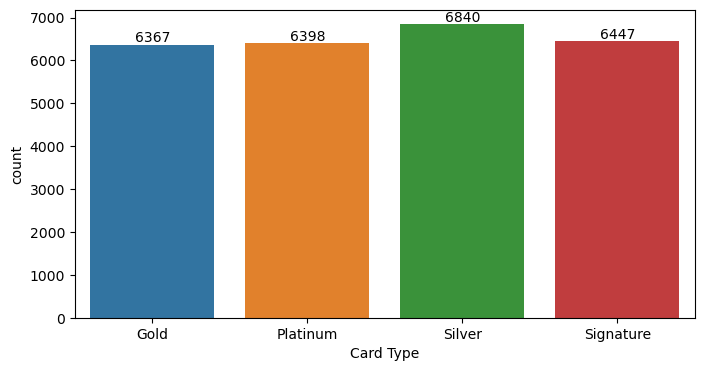

In [156]:
# count of card_type
plt.figure(figsize=(8,4))
# create a barplot
ax=sns.countplot(data=df,x='Card Type')
for bars in ax.containers:
    ax.bar_label(bars)
    

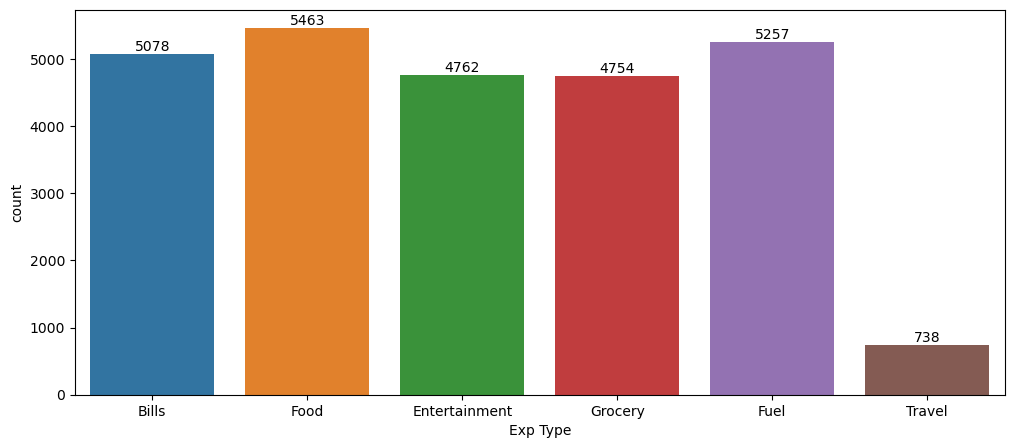

In [160]:
# count of exp type 
# create a countplot
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df,x='Exp Type')
for bars in ax .containers:
    ax.bar_label(bars)

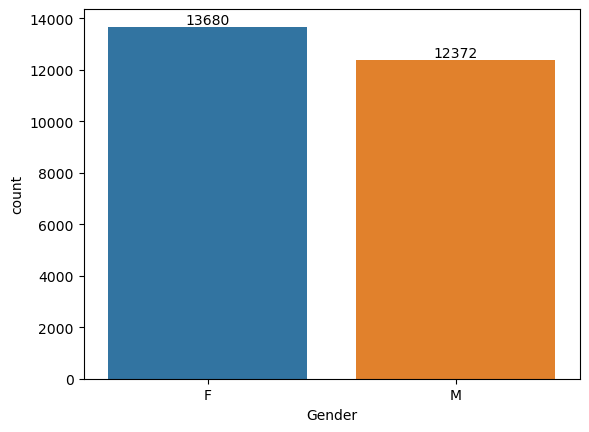

In [161]:
# count of Gender
# create a countplot
ax=sns.countplot(data=df,x='Gender')
for bars in ax.containers:
    ax.bar_label(bars)


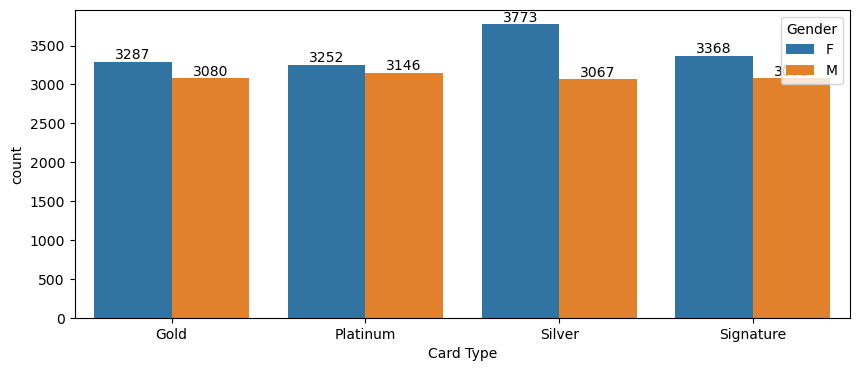

In [162]:
# count of Card type by Gender Wise
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df,x='Card Type',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)


Text(0.5, 1.0, 'Count by Exp type by Gender wise')

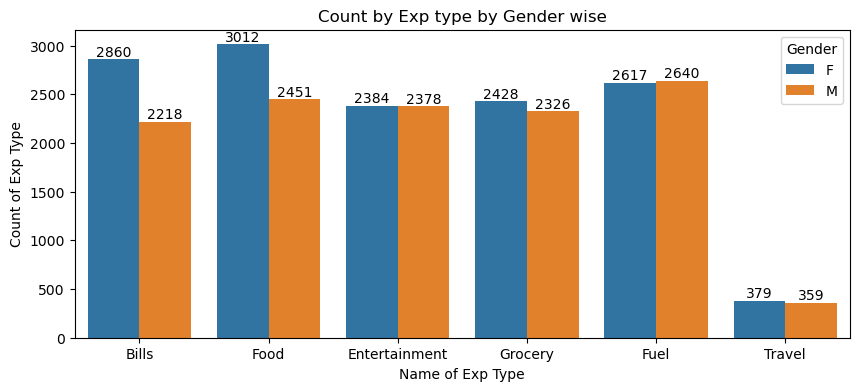

In [164]:
# count of gender by Exp Type
plt.figure(figsize=(10,4))
# create a countplot

ax=sns.countplot(data=df,x='Exp Type',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Name of Exp Type')
plt.ylabel('Count of Exp Type')
plt.title('Count by Exp type by Gender wise')

# total sum of amount by card type

Text(0.5, 1.0, 'Sum Of All Amount By Card Typs')

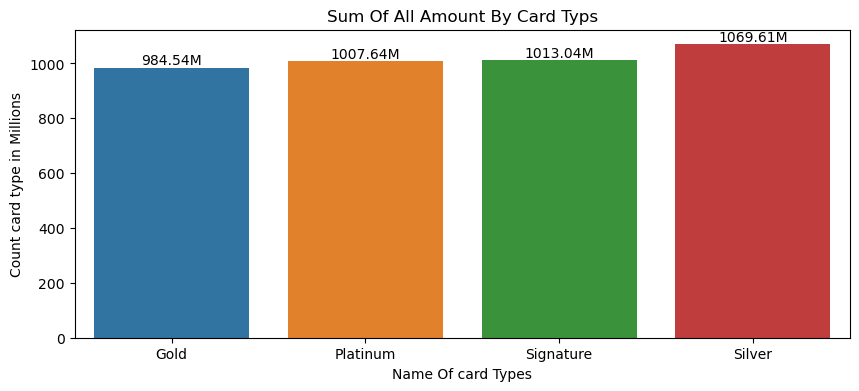

In [165]:
# sum of total amount by card types
plt.figure(figsize=(10,4))
total_Amount = df.groupby('Card Type')['Amount'].sum().reset_index()

# convert in millions
total_Amount ['Amount'] = total_Amount['Amount'] / 1_000_000

# create bar chart
ax = sns.barplot(data=total_Amount,x='Card Type',y='Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')
    
plt.xlabel('Name Of card Types')    
plt.ylabel('Sum of Values  in Millions')
plt.title('Sum Of All Amount By Card Typs')

# total amount by Gender Wise

Text(0.5, 1.0, 'Sum Of All Amount BY Gender Wise')

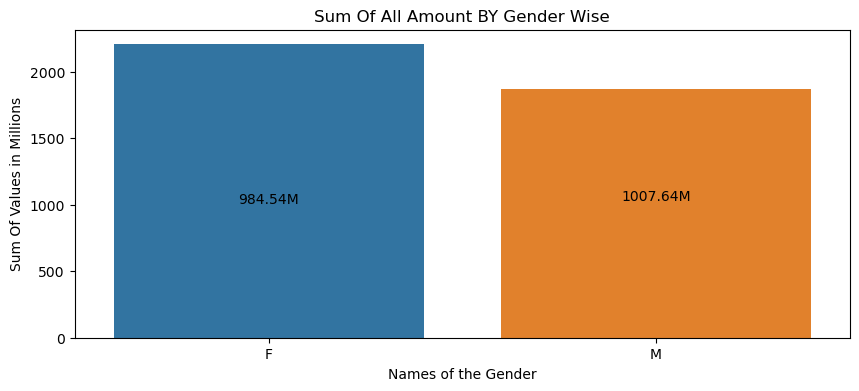

In [166]:
# Sum fo all amount by gender wise 
plt.figure(figsize=(10,4))
sum_amount = df.groupby('Gender')['Amount'].sum().reset_index()

# covert in million 
sum_amount['Amount'] = sum_amount['Amount'] / 1_000_000

# create barplot
ax=sns.barplot(data=sum_amount,x='Gender',y='Amount')
for bar in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')    
plt.ylabel('Sum Of Values in Millions')   
plt.xlabel('Names of the Gender')
plt.title('Sum Of All Amount BY Gender Wise')

# Total Amount By Exp Type

Text(0.5, 1.0, 'Sum Of total Amount By Exp Type')

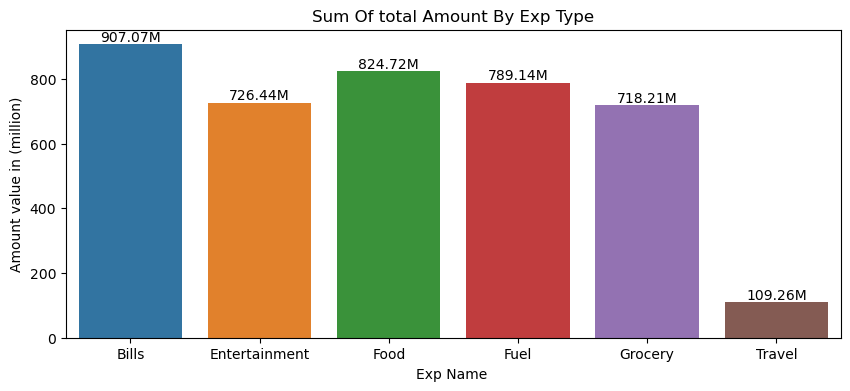

In [129]:
# sum of total amount by exp type
plt.figure(figsize=(10,4))
sum_amount= df.groupby('Exp Type')['Amount'].sum().reset_index()

# covert value in millions
sum_amount['Amount']=sum_amount['Amount']/1_000_000

# create a barplot show our data easly
ax=sns.barplot(data=sum_amount,x='Exp Type',y='Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')
plt.xlabel('Exp Name ')    
plt.ylabel('Amount value in (million)')
plt.title('Sum Of total Amount By Exp Type')

# total amount year_wise

Text(0.5, 1.0, 'Sum OF All Values By Year Wise')

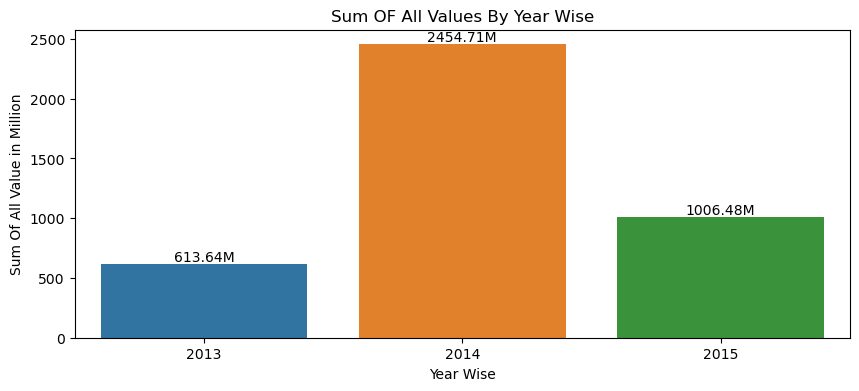

In [167]:
# year_by_year_total_amount
plt.figure(figsize=(10,4))
total_amount = df.groupby(['Year'])['Amount'].sum().reset_index()
# convert in million 
total_amount['Amount'] = total_amount['Amount'] / 1_000_000
ax=sns.barplot(data=total_amount,x='Year',y='Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')
plt.xlabel('Year Wise')    
plt.ylabel('Sum Of All Value in Million')
plt.title('Sum OF All Values By Year Wise')

# Average Amount  By each Exp Type

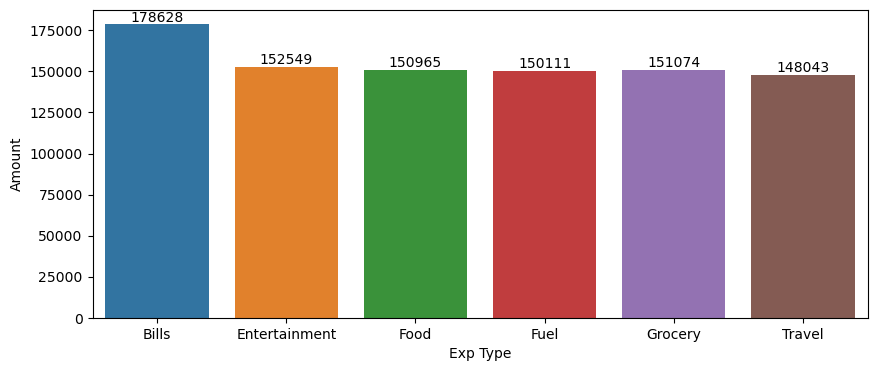

In [36]:
plt.figure(figsize=(10,4))
average_amount = df.groupby(['Exp Type'])['Amount'].mean().reset_index()
ax=sns.barplot(data=average_amount,x='Exp Type',y='Amount')
for bars in ax.containers:
    ax.bar_label(bars)

# Top 10 City With Highest Amount 

In [61]:
# Group by city and sum the amounts
city_amounts = df.groupby('City')['Amount'].sum().reset_index()

# Sort by amount in descending order and get the top 10
top_10_cities = city_amounts.sort_values(by='Amount', ascending=False).head(10)

print(top_10_cities)


               City     Amount
170  Greater Mumbai  576751476
71        Bengaluru  572326739
8         Ahmedabad  567794310
126           Delhi  556929212
267         Kolkata  115466943
300         Lucknow  115334476
109         Chennai  114730600
193       Hyderabad  114493477
821           Surat  114486151
237          Kanpur  114370532


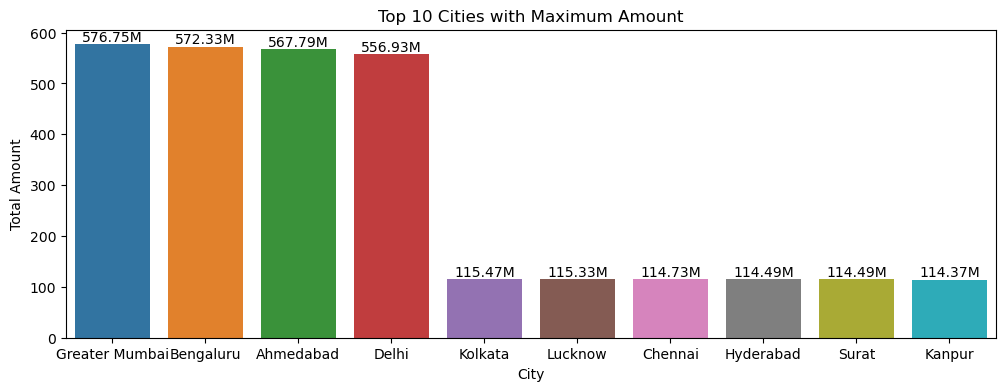

In [119]:
# Group by city and sum the amounts
city_amounts = df.groupby('City')['Amount'].sum().reset_index()
# convet in million 
city_amounts['Amount'] =city_amounts['Amount'] / 1_000_000
# Sort by amount in descending order and get the top 10
top_10_cities = city_amounts.sort_values(by='Amount', ascending=False).head(10)
# Plotting the bar plot
plt.figure(figsize=(12, 4))
ax=sns.barplot(y='Amount', x='City', data=top_10_cities)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')
plt.title('Top 10 Cities with Maximum Amount')
plt.ylabel('Total Amount')
plt.xlabel('City')
plt.show()

# Bottom 10 City with Low Amount

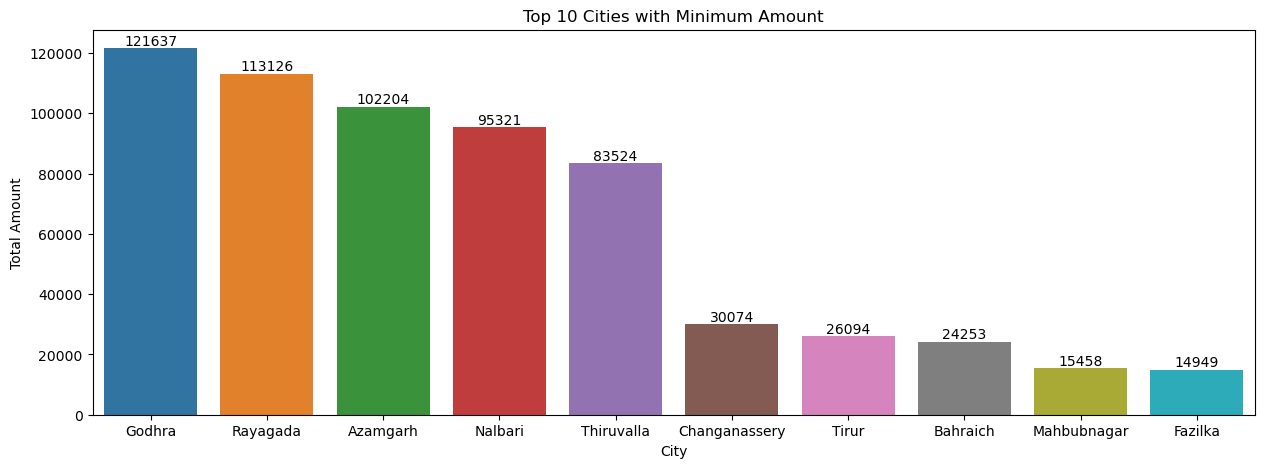

In [123]:
# Group by city and sum the amounts
city_amounts = df.groupby('City')['Amount'].sum().reset_index()

# Sort by amount in descending order and get the bottom 10
top_10_cities = city_amounts.sort_values(by='Amount', ascending=False).tail(10)

# Plotting the bar plot
plt.figure(figsize=(15, 5))
ax=sns.barplot(y='Amount', x='City', data=top_10_cities)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Top 10 Cities with Minimum Amount')
plt.ylabel('Total Amount')
plt.xlabel('City')
plt.show()

In [64]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Country
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,2014,10,India
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014,8,India
2,2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014,8,India
3,3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014,4,India
4,4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015,5,India


# which Year Maximum Amount Pay and which Exp Types and which Months

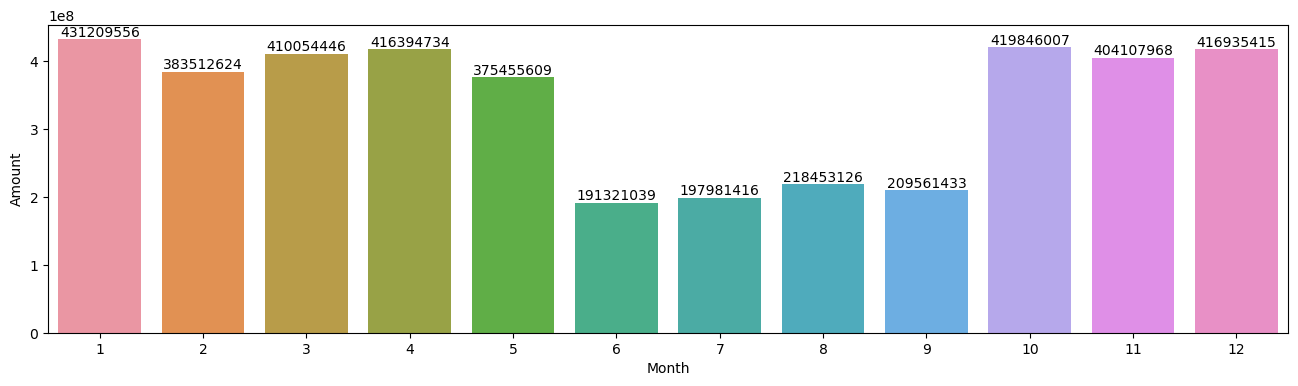

In [67]:
# which Month maximum Amount Pay  using group by 
plt.figure(figsize=(16,4))
sum_amount = df.groupby('Month')['Amount'].sum().reset_index()
ax=sns.barplot(data=sum_amount,x='Month',y='Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f')

which Card Type how many Amount Pay in percentage Amount 

   Card Type      Amount
0       Gold   984539536
1   Platinum  1007639019
2  Signature  1013041105
3     Silver  1069613713


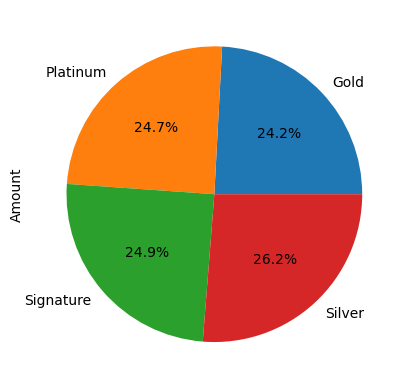

In [52]:
# which card type total amount 
card_amount = df.groupby('Card Type')['Amount'].sum().reset_index()
print(card_amount)
# create Pie chart
card_amount = df.groupby('Card Type')['Amount'].sum().plot(kind='pie',autopct='%1.1f%%')

Gender wise Amount each Year how many many Amount Spend 

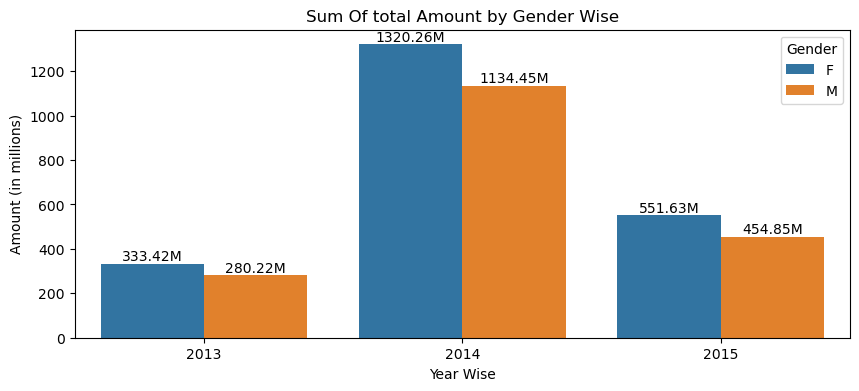

In [124]:
# Sum of total amount by gender and year
plt.figure(figsize=(10, 4))
sum_amount = df.groupby(['Gender', 'Year'])['Amount'].sum().reset_index()
# Convert to millions
sum_amount['Amount'] = sum_amount['Amount'] / 1_000_000  
# Create bar plot to show data easily
ax = sns.barplot(data=sum_amount, x='Year', y='Amount', hue='Gender')

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2fM') 
    
plt.ylabel('Amount (in millions)')
plt.xlabel('Year Wise')
plt.title('Sum Of total Amount by Gender Wise')
plt.show()


# Total Amount By Exp Type How Many Amount

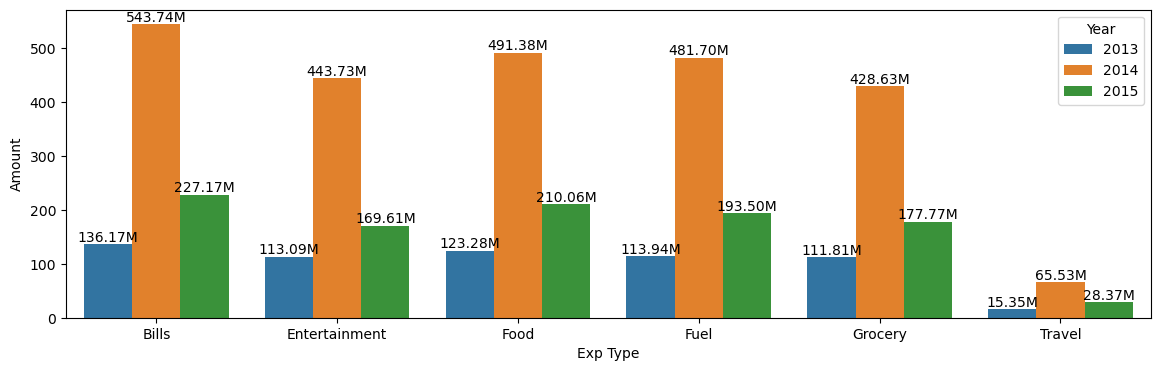

In [144]:
# sum of total amount  by exp type Year wise
plt.figure(figsize=(14,4))
total_amount = df.groupby(['Exp Type','Year'])['Amount'].sum().reset_index()

# convert values in million
total_amount ['Amount'] = total_amount['Amount'] / 1_000_000

# create a bar plot
ax=sns.barplot(data=total_amount,x='Exp Type',y='Amount',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

# Sum of all amount by Card Type 

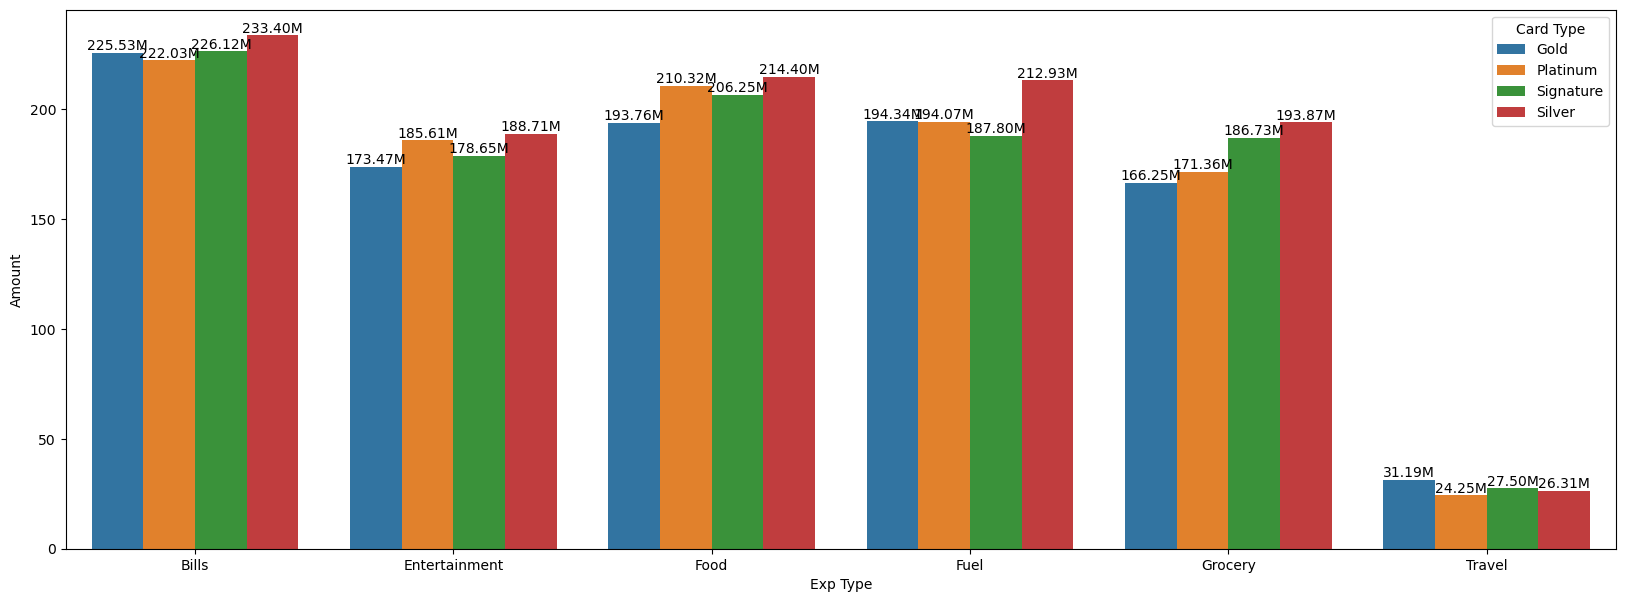

In [149]:
# sum of total amount  by exp type card type
plt.figure(figsize=(20,7))
total_amount = df.groupby(['Exp Type','Card Type'])['Amount'].sum().reset_index()

# convert values in million
total_amount ['Amount'] = total_amount['Amount'] / 1_000_000

# create a bar plot
ax=sns.barplot(data=total_amount,x='Exp Type',y='Amount',hue='Card Type')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')